In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### EDA

In [ ]:
df = pd.read_csv(r"Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Statistical Summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.describe(include = "O")

,Gender
count,200
unique,2
top,Female
freq,112


#### Analysis of Gender, Age and Income Distribution Of Mall Customers

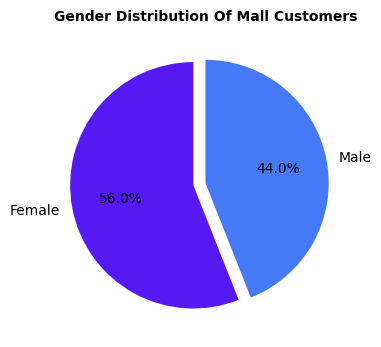

In [ ]:
#Visualizing Gender Distribution of Mall Customers
plt.figure(figsize = (4,4))
df["Gender"].value_counts().plot(kind="pie",autopct ='%1.1f%%',startangle=90, colors=['#5619f4','#4679f6'], explode=(0.1, 0), labels = df["Gender"].value_counts().index)
plt.title("Gender Distribution Of Mall Customers",fontsize = 10, fontweight = 600)
plt.ylabel("")
plt.show()

In [ ]:
# Checking Number of unique Ages.
df["Age"].nunique()

51

In [ ]:
# Creating a temporary DF for analysis sake
temp_df = df

In [ ]:
# Defining a function that would assign name tags to the different age ranges.
def age_grouper(age):
    if age < 35:
        return "Young Adults"
    elif 34 < age < 55 :
        return "Adults"
    elif 54 < age < 70 :
        return "Older Adults"

# Creating a column that holds the age_group detail
temp_df["AgeGroup"] = temp_df["Age"].apply(age_grouper)

In [ ]:
#Dropping the `Age` Column
temp_df.drop(columns = "Age", inplace = True)

temp_df.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,15,39,Young Adults
1,2,Male,15,81,Young Adults
2,3,Female,16,6,Young Adults
3,4,Female,16,77,Young Adults
4,5,Female,17,40,Young Adults


In [ ]:
age_df = df["AgeGroup"].value_counts()
age_df

AgeGroup
Young Adults    89
Adults          81
Older Adults    28
Name: count, dtype: int64

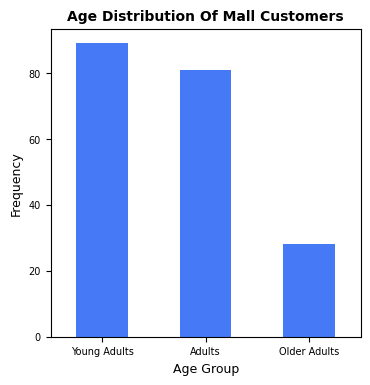

In [ ]:
#Visualizing Gender Distribution of Mall Customers
plt.figure(figsize = (4,4))
age_df.plot(kind="bar", color='#4679f6' )
plt.title("Age Distribution Of Mall Customers", fontsize = 10,fontweight = 600)
plt.ylabel("Frequency",fontsize = 9)
plt.xlabel("Age Group", fontsize = 9)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

In [ ]:
# Defining a function that would assign name tags to the different Income ranges.
def income_grouper(income):
    if income < 40:
        return "Lower Class"
    elif 40 < income < 70 :
        return "Middle Class"
    elif 70 < income :
        return "First Class"

# Creating a column that holds the age_group detail
temp_df["IncomeGroup"] = temp_df["Annual Income (k$)"].apply(income_grouper)

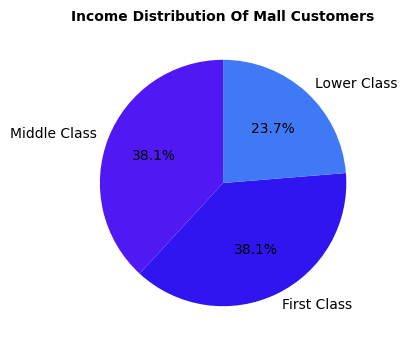

In [ ]:
#Visualizing Wealth Distribution of Mall Customers
plt.figure(figsize = (4,4))
temp_df["IncomeGroup"].value_counts().plot(kind="pie",autopct ='%1.1f%%',startangle=90, colors=["#5019f4","#3015f1","#4079f6"], labels = temp_df["IncomeGroup"].value_counts().index)
plt.title("Income Distribution Of Mall Customers",fontsize = 10, fontweight = 600)
plt.ylabel("")
plt.show()

#### BIVARIATE EDA

In [ ]:
gender_analysis = temp_df.groupby(by = "Gender", as_index = False).agg(
    Maximum_Income = ("Annual Income (k$)","max") ,
    Average_Income = ("Annual Income (k$)","mean") ,
    Average_Spending_Score = ("Spending Score (1-100)","mean") ,
    Frequency = ("CustomerID", "nunique")
)
gender_analysis

,Gender,Maximum_Income,Average_Income,Average_Spending_Score,Frequency
0,Female,126,59.250000,51.526786,112
1,Male,137,62.227273,48.511364,88


In [ ]:
age_group_analysis = temp_df.groupby(by = "AgeGroup", as_index = False).agg(
    Maximum_Income = ("Annual Income (k$)","max") ,
    Average_Income = ("Annual Income (k$)","mean") ,
    Average_Spending_Score = ("Spending Score (1-100)","mean") ,
    Frequency = ("CustomerID", "nunique")
)
age_group_analysis

,AgeGroup,Maximum_Income,Average_Income,Average_Spending_Score,Frequency
0,Adults,126,62.876543,43.074074,81
1,Older Adults,93,54.250000,37.857143,28
2,Young Adults,137,60.730337,60.449438,89


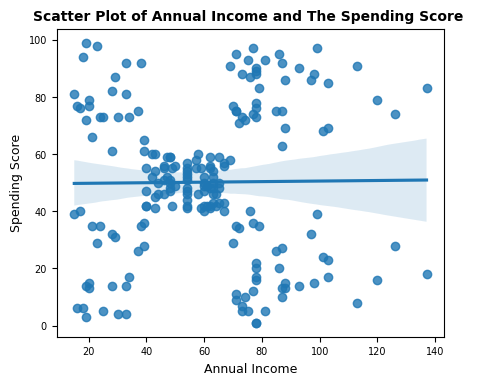

In [ ]:
plt.figure(figsize = (5,4))
sns.regplot(x="Annual Income (k$)", y = "Spending Score (1-100)",data = temp_df)
plt.title("Scatter Plot of Annual Income and The Spending Score ", fontsize = 10, fontweight = 550)
plt.xlabel("Annual Income",fontsize = 9)
plt.ylabel("Spending Score", fontsize = 9)
plt.xticks( fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

## Model Infrastructure

In [ ]:
# Feature Selection
df_edit = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
# Constructing a column transformer for the sake of preprocessing.
col_transform  = ColumnTransformer([
    ('numerical_transform', StandardScaler(), ["Annual Income (k$)","Spending Score (1-100)"])
], n_jobs = -1)

In [ ]:
# Constructing a model pipeline
pipeline = Pipeline([("preprocessor",col_transform),("clustering", KMeans(n_clusters = 3, random_state = 42 ))] )

In [ ]:
# Fitting the DataFrame into the pipeline
pipeline.fit(df_edit)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical_transform',
                                                  StandardScaler(),
                                                  ['Annual Income (k$)',
                                                   'Spending Score '
                                                   '(1-100)'])])),
                ('clustering', KMeans(n_clusters=3, random_state=42))])

In [ ]:
# Retrieving Processor from the pipeline
preprocessor = pipeline["preprocessor"]

# Creating a scaled df
prepro_df = preprocessor.fit_transform(df_edit)

In [ ]:
# Getting the inertias for different number of clusters
inertia = []
shilloute_scores = []
k_values  = range(2,11)

for k in k_values :
    kmeans = KMeans(n_clusters = k, random_state = 42)
    pipeline.set_params(clustering = kmeans)
    cluster_labels = pipeline.fit_predict(df_edit)
    shilouette_score = silhouette_score(prepro_df, cluster_labels)
    shilloute_scores.append(shilouette_score)
    inertia.append(pipeline.named_steps["clustering"].inertia_)

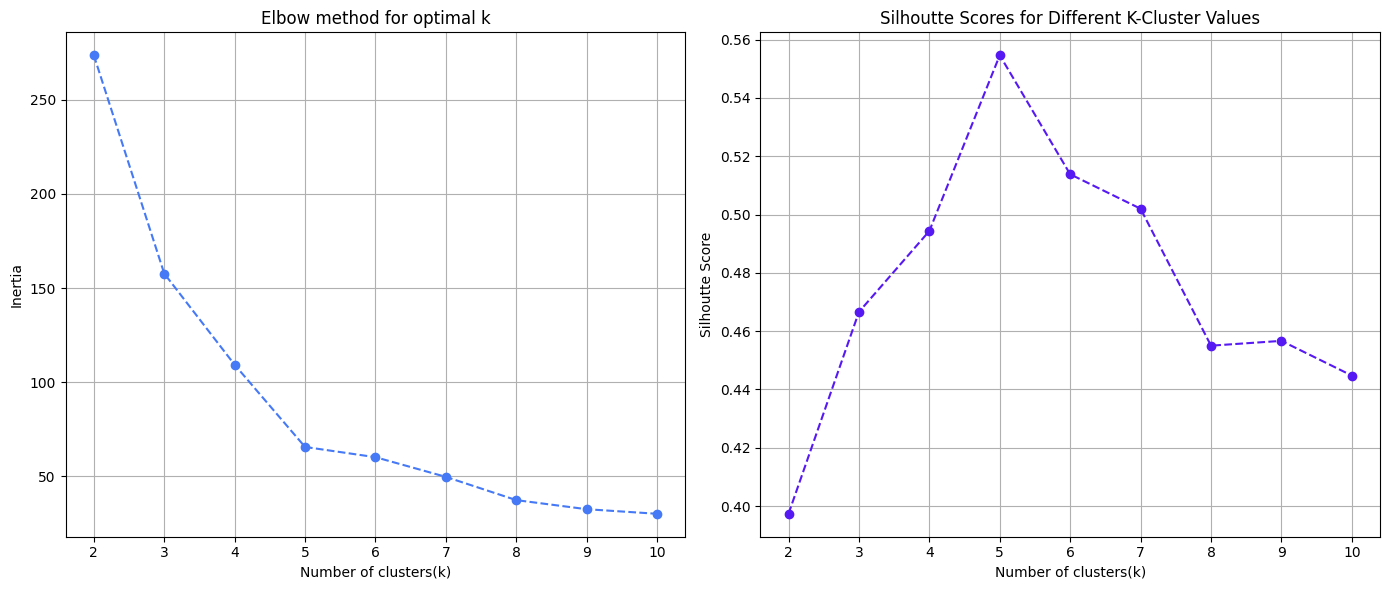

In [ ]:
# Plotting the Elbow curve to deduce the optimal number of clusters.
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker ="o",linestyle = "--", color = "#4679f6")
plt.title("Elbow method for optimal k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, shilloute_scores, marker ="o",linestyle = "--", color = "#5619f4")
plt.title("Silhoutte Scores for Different K-Cluster Values")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Silhoutte Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predicting the clusters.
kmeans = KMeans(n_clusters =5, init = "k-means++", random_state = 42)
pipeline.set_params(clustering = kmeans)
df["kmeans_cluster"] = pipeline.fit_predict(df_edit)

In [ ]:
# Model Evaluation
shilouette_avg = silhouette_score(prepro_df, df["kmeans_cluster"])
print(f"Shilouette score :{shilouette_avg:.3f}")

Shilouette score :0.555


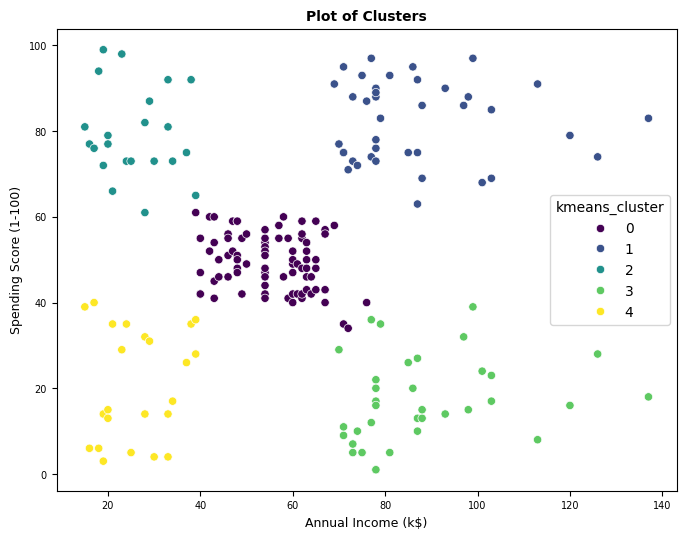

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df["Annual Income (k$)"],y= df["Spending Score (1-100)"] ,hue=df["kmeans_cluster"], palette = "viridis")
plt.title("Plot of Clusters", fontsize = 10, fontweight = 550)
plt.xlabel("Annual Income (k$)",fontsize = 9)
plt.ylabel("Spending Score (1-100)", fontsize = 9)
plt.xticks( fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

In [ ]:
df["kmeans_cluster"] = df["kmeans_cluster"].replace({0:"Engage",1:"Retain",2:"Manage",3:"Encourage",4:"Assist"})

In [ ]:
df.groupby("kmeans_cluster").count()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeGroup
kmeans_cluster,,,,,,
Assist,23,23,23,23,23,23
Encourage,35,35,35,35,35,34
Engage,81,81,81,81,79,77
Manage,22,22,22,22,22,22
Retain,39,39,39,39,39,38


## Report
--------
**Customer Demographics**
- **Gender Distribution** : There was more female patrons(`56%`) than male(`44%`)
- **Age Distribution** : `Young Adults(18-35)` were 89 in number, closely followed by `Adults(35-55)` which were 81 and `Older Adults(55-70)` were just 28 in number.
- **Income Distribution** : `First Class Earners(Above $70k)` and `Middle class Earners(Between $40k t0 $70k)` equally shared 76.2% of the customer base, while Lower Class Earners(Below $40k) accounted for 23.7% of the base.

--------
**Model Description**
- **Model Selection** : I used a `KMeans` Clustering Model
- **Model Features** : I used the `Annual Income (k$)` and `Spending Score (1-100)` as the model features
- **Optimal K selection** : I used the `inertia vs k_clusters(Elbow Method)` `and silhoutte_score vs k_clusters` as the basis for determining the optimal number of clusters. With an `inertia` between `(50-75)` and `silhoutte_score` of `0.555` I chose the cluster number 5. since it had a low inertia and a high silhoutte score. I personally think 5 is a resonable number when it comes to customer segmentation (human behaviour varies - it turned out i was right)
- **Model Evaluation** : `silhoutte_score` of `0.555`
  
--------
**Cluster Description**
- **Cluster 0 (Engage)** - These set of customers are mid-range earners(earning between `$40-$70`) who spend within their means. They account for more than 40%(81 of the customers) of the customer base. They seem more stable hence, we should try our best to keep up with product qauality and affordability, this way nothing would derail their behaviour.
- **Cluster 1 (Retain)** : These set of customers contribute very much to the mall earnings and they do all these within their means, which indicates that they are premium members which we must by all means retain.
- **Cluster 2 (Manage)** - These set of customers are low earners, who spend big. This might be risky and we will need programs and actions that can help them continue in their patronage without us putting them in a finacial bondage.
- **Cluster 3 (Encourage)** - These set of customers are high earners who spend less. We might need to implement actions that would spur them to buy more. e.g Special Deals e.t.c
- **Cluster 4 (Assist)** - These customers are low earners and they also spend within their means. We could help their purchasing power by providing them with more affordable options.

--------
**NOTE**
- **`temp_df`** : A copy of the original dataframe that i used for my analysis
--------
### Thank You !